# Draft Code with Verification and Unit Tests

## Objective: 
Calculate the daily maximum wind speed (mph) for each Climate zone 1-9 (don’t include the Central Valley). 

## Inputs:
Using the WRF data and FDCZ (Fire Danger Climate Zone) shapefile, 

Attached is the FDCZ shapefile (tar file), land/sea mask file (nc file),  and the WRF netCDF data for a random day

## Outputs:
Create a map displaying each climate zone color coded by the maximum daily wind speed.   can be found at the link below.

Just to be clear, we are expecting a map of **maximum daily wind speed by zone** along with a file of the code you used to create that map.


    Created by Edwin Campos, on 2020 Apr.23
    Last modification on 2020 Apr.27 by ecampos.phd@gmail.com


In [1]:
# GLOBAL VARIABLES
WRF_FILE = 'wrf_daily_ts_2017-10-08.nc'
MASK_FILE='invariant_d01.nc'
SHAPE_PATH='./fdcz_pl/fdcz_pl'

## Read NetCDF files

References:

    https://anaconda.org/anaconda/netcdf4
    http://atmos.colostate.edu/~btrabing/Read_WRF.html
    https://stackoverflow.com/questions/35297771/wrf-netcdf-file-subset-smaller-array-out-of-dataset-based-on-coordinate-bounda

In [2]:
# Dependencies
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt

In [3]:
# Input WRF dataset
wrf_data = Dataset(WRF_FILE, "r")
mask_data= Dataset(MASK_FILE, "r")

In [4]:
print(wrf_data.variables)

OrderedDict([('times', <class 'netCDF4._netCDF4.Variable'>
|S1 times(Time, DateStrLen)
unlimited dimensions: Time
current shape = (24, 19)
filling on, default _FillValue of   used
), ('T2', <class 'netCDF4._netCDF4.Variable'>
float32 T2(Time, south_north, west_east)
    stagger: 
    coordinates: XLONG XLAT
    units: K
    description: TEMP at 2 M
unlimited dimensions: Time
current shape = (24, 320, 256)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('RH2', <class 'netCDF4._netCDF4.Variable'>
float32 RH2(Time, south_north, west_east)
    description: Near-sfc RH
    units: %
    stagger: 
    coordinates: XLONG XLAT
unlimited dimensions: Time
current shape = (24, 320, 256)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('U10', <class 'netCDF4._netCDF4.Variable'>
float32 U10(Time, south_north, west_east)
    stagger: 
    coordinates: XLONG XLAT
    units: m s-1
    description: U at 10m
unlimited dimensions: Time
current shape = (24, 320, 256)
fillin

In [5]:
print(mask_data.variables)

OrderedDict([('COSALPHA', <class 'netCDF4._netCDF4.Variable'>
float32 COSALPHA(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    description: Local cosine of map rotation
    units: 
    stagger: 
    coordinates: XLONG XLAT
unlimited dimensions: Time
current shape = (1, 320, 256)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('HGT', <class 'netCDF4._netCDF4.Variable'>
float32 HGT(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    description: Terrain Height
    units: m
    stagger: 
    coordinates: XLONG XLAT
unlimited dimensions: Time
current shape = (1, 320, 256)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('LANDMASK', <class 'netCDF4._netCDF4.Variable'>
float32 LANDMASK(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    description: LAND MASK (1 FOR LAND, 0 FOR WATER)
    units: 
    stagger: 
    coordinates: XLONG XLAT
unlimited dimensions: Time
current shape = (1, 320, 2

In [6]:
# Get the horizontal grid
lats = mask_data.variables['XLAT'][:]    # degree_north
longs = mask_data.variables['XLONG'][:]  # degree_east
print(lats)
print(longs)

[[[33.824394 33.825592 33.82678  ... 33.82678  33.825592 33.824394]
  [33.85127  33.85247  33.85365  ... 33.85365  33.85247  33.85127 ]
  [33.878147 33.879337 33.880527 ... 33.880527 33.879337 33.878147]
  ...
  [42.35921  42.360554 42.36189  ... 42.36189  42.360554 42.35921 ]
  [42.386093 42.38743  42.38876  ... 42.38876  42.38743  42.386093]
  [42.412956 42.41429  42.41563  ... 42.41563  42.41429  42.412956]]]
[[[-125.13013  -125.09778  -125.06543  ... -116.93457  -116.90222
   -116.86987 ]
  [-125.13158  -125.09921  -125.066864 ... -116.933136 -116.90079
   -116.86842 ]
  [-125.133026 -125.10065  -125.06827  ... -116.93173  -116.89935
   -116.866974]
  ...
  [-125.644516 -125.608154 -125.57178  ... -116.42822  -116.391846
   -116.355484]
  [-125.64633  -125.609955 -125.57358  ... -116.42642  -116.390045
   -116.35367 ]
  [-125.64816  -125.61177  -125.57538  ... -116.42462  -116.38823
   -116.35184 ]]]


In [7]:
# Get the Wind speed
u10 = wrf_data.variables['U10'][:]   # U component of wind at 10m, in m/s
v10 = wrf_data.variables['V10'][:]   # V component of wind at 10m, in m/s

**LAT** and **LON** are numpy arrays of shape (x,y)

**U** and **V** are numpy arrays of shape (time,x,y)

### Format the time values from bytes into strings

In [8]:
nctime = wrf_data.variables['times'][:] 
print(nctime)
nctime_str = [bytearray(x) for x in nctime]
print(nctime_str[:])

[[b'2' b'0' b'1' b'7' b'-' b'1' b'0' b'-' b'0' b'8' b'_' b'0' b'0' b':'
  b'0' b'0' b':' b'0' b'0']
 [b'2' b'0' b'1' b'7' b'-' b'1' b'0' b'-' b'0' b'8' b'_' b'0' b'1' b':'
  b'0' b'0' b':' b'0' b'0']
 [b'2' b'0' b'1' b'7' b'-' b'1' b'0' b'-' b'0' b'8' b'_' b'0' b'2' b':'
  b'0' b'0' b':' b'0' b'0']
 [b'2' b'0' b'1' b'7' b'-' b'1' b'0' b'-' b'0' b'8' b'_' b'0' b'3' b':'
  b'0' b'0' b':' b'0' b'0']
 [b'2' b'0' b'1' b'7' b'-' b'1' b'0' b'-' b'0' b'8' b'_' b'0' b'4' b':'
  b'0' b'0' b':' b'0' b'0']
 [b'2' b'0' b'1' b'7' b'-' b'1' b'0' b'-' b'0' b'8' b'_' b'0' b'5' b':'
  b'0' b'0' b':' b'0' b'0']
 [b'2' b'0' b'1' b'7' b'-' b'1' b'0' b'-' b'0' b'8' b'_' b'0' b'6' b':'
  b'0' b'0' b':' b'0' b'0']
 [b'2' b'0' b'1' b'7' b'-' b'1' b'0' b'-' b'0' b'8' b'_' b'0' b'7' b':'
  b'0' b'0' b':' b'0' b'0']
 [b'2' b'0' b'1' b'7' b'-' b'1' b'0' b'-' b'0' b'8' b'_' b'0' b'8' b':'
  b'0' b'0' b':' b'0' b'0']
 [b'2' b'0' b'1' b'7' b'-' b'1' b'0' b'-' b'0' b'8' b'_' b'0' b'9' b':'
  b'0' b'0' b':' b'0' b'0']


In [9]:
times_str = [x.decode("utf-8") for x in nctime_str]
print(times_str)

['2017-10-08_00:00:00', '2017-10-08_01:00:00', '2017-10-08_02:00:00', '2017-10-08_03:00:00', '2017-10-08_04:00:00', '2017-10-08_05:00:00', '2017-10-08_06:00:00', '2017-10-08_07:00:00', '2017-10-08_08:00:00', '2017-10-08_09:00:00', '2017-10-08_10:00:00', '2017-10-08_11:00:00', '2017-10-08_12:00:00', '2017-10-08_13:00:00', '2017-10-08_14:00:00', '2017-10-08_15:00:00', '2017-10-08_16:00:00', '2017-10-08_17:00:00', '2017-10-08_18:00:00', '2017-10-08_19:00:00', '2017-10-08_20:00:00', '2017-10-08_21:00:00', '2017-10-08_22:00:00', '2017-10-08_23:00:00']


### Extract winds at a particular lat,lon

In [10]:
print(type(lats),lats.shape)
print(type(longs),longs.shape)
print(type(times_str), len(times_str) )
print(type(u10),u10.shape)
print(type(v10),v10.shape)

<class 'numpy.ma.core.MaskedArray'> (1, 320, 256)
<class 'numpy.ma.core.MaskedArray'> (1, 320, 256)
<class 'list'> 24
<class 'numpy.ma.core.MaskedArray'> (24, 320, 256)
<class 'numpy.ma.core.MaskedArray'> (24, 320, 256)


In [11]:
lat_obs = 37.7644
long_obs = -121.9540
coordinates = np.unravel_index((np.abs(lats - lat_obs) + 
                                np.abs(longs - long_obs)).argmin(), 
                               lats.shape)
print(coordinates)

(0, 143, 100)


In [12]:
# Validate
print(lats[coordinates], longs[coordinates])

37.751087 -121.938324


In [13]:
# Find pixel-range based on the provided lat-lon
def find_pixels(lat_array,  # Array with latitudes  in the NetCDF file
                lon_array,  # Array with longitudes in the NetCDF file
                mylat,     # Latitude value one to be matched to a pixel
                mylon):    # Longitude value to be matched to a pixel
    "Outputs: coordinates: (time_index, x_pixel_index, y_pixel_indes)"
    
    coordinates = np.unravel_index((np.abs(lat_array - mylat) + 
                                    np.abs(lon_array - mylon)).argmin(), 
                                   lat_array.shape)
    
    return coordinates

In [14]:
# Validate
san_ramon_lat = 37.7644
san_ramon_lon = -121.9540
pixel_coordinates = find_pixels(lat_array=lats, 
                          lon_array=longs,
                          mylat=san_ramon_lat,
                          mylon=san_ramon_lon)
print(pixel_coordinates, pixel_coordinates[1:])
print(lats[pixel_coordinates], longs[pixel_coordinates])

(0, 143, 100) (143, 100)
37.751087 -121.938324


In [65]:
# List wind values
u10_time = u10[:,pixel_coordinates[1], pixel_coordinates[2]]
print('u10:', u10_time)
v10_time = v10[:,pixel_coordinates[1], pixel_coordinates[2]]
print('v10:', v10_time)
speed_time = (u10_time**2 + v10_time**2)**0.5
print('Wind Speeds:', speed_time)
print("max_wind(m/s):", max(speed_time))
# I manualy validated for speed_time[0] and speed_time[-1]

u10: [ 1.43788     1.0371825  -1.1281722   0.24685748  0.7650842   1.6698962
  1.8408111   1.7607706   1.5985771   1.933602    2.0516458   2.2162855
  1.6295602   1.6050293   1.3692856   2.303459    2.0056553   1.7469375
  1.9214604   2.5303571   2.8808727   2.6294363   1.6649076   1.3128626 ]
v10: [ 0.3964637  -0.66054946  0.142182    1.6731651   1.530715    0.08108234
 -1.5829245  -2.7210696  -0.1800741  -3.9051445  -6.186078   -7.140886
 -6.8337164  -6.7692394  -6.7861214  -7.44211    -7.4399447  -7.3176064
 -6.3386025  -7.175972   -6.486578   -5.3904963  -4.635575   -5.8391914 ]
Wind Speeds: [1.4915369 1.2296638 1.1370964 1.6912776 1.7112691 1.6718636 2.4278047
 3.2410698 1.6086875 4.3576336 6.517424  7.476909  7.025322  6.9569187
 6.9228888 7.790438  7.7055454 7.523241  6.623435  7.6090264 7.0975432
 5.997615  4.925492  5.9849615]
max_wind(m/s): 7.790438


## Read Shape files with PyShp

References:
    
    https://pypi.org/project/pyshp/
    

In [16]:
# Dependencies
import shapefile
import pandas as pd

In [17]:
# Get data (simply specify the base filename of the shapefile)
sf_data = shapefile.Reader(SHAPE_PATH)

There are 3 key files associated with any and all shapefiles:

    .shp: the file that contains the geometry for all features.
    .shx: the file that indexes the geometry.
    .dbf: the file that stores feature attributes in a tabular format.

Note that, sometimes, a shapefile will have other associated files including:

    .prj: the file that contains information on projection format including the coordinate system and projection information. It is a plain text file describing the projection using well-known text (WKT) format.
    .sbn and .sbx: the files that are a spatial index of the features.
    .shp.xml: the file that is the geospatial metadata in XML format, (e.g. ISO 19115 or XML format).

In [18]:
#sf_data = shapefile.Reader(SHAPE_PATH)  # Open, read, and close the shapefiles
shapes = sf_data.shapes()  # Geometry: shp file with points, polygons, or polines
fields = sf_data.fields    # Atributes: shx file with headers. This file is optional for reading.
records= sf_data.records() # Records: dbf file with contents

In [19]:
print(fields)
#print('NumShapes=',len(shapes))
#[[longi,lati]] = shapes[3].points
#print(shapes[3].points)

[('DeletionFlag', 'C', 1, 0), ['OBJECTID', 'N', 10, 0], ['FDCZ', 'C', 10, 0], ['Shape_Leng', 'F', 19, 11], ['Shape_Area', 'F', 19, 11]]


In [20]:
print(sf_data)
print(sf_data.shapeType)

shapefile Reader
    9 shapes (type 'POLYGON')
    9 records (5 fields)
5


Shape types are represented by numbers between 0 and 31 as defined by the shapefile specification and listed below (existing shape types are not sequential):

    NULL = 0
    POINT = 1
    POLYLINE = 3
    POLYGON = 5
    MULTIPOINT = 8
    POINTZ = 11
    POLYLINEZ = 13
    POLYGONZ = 15
    MULTIPOINTZ = 18
    POINTM = 21
    POLYLINEM = 23
    POLYGONM = 25
    MULTIPOINTM = 28
    MULTIPATCH = 31

In [21]:
sf_data.records()[:]

[Record #0: [1, '2', 1390085.42269, 17666548994.1],
 Record #1: [2, '7', 729435.83367, 15430289623.4],
 Record #2: [3, '4', 958413.83175, 9903732149.59],
 Record #3: [4, '8', 1449745.07201, 30082596718.2],
 Record #4: [5, '1', 723620.623482, 13363523334.2],
 Record #5: [6, 'CV', 1683096.83967, 43468179793.4],
 Record #6: [7, '6', 1499360.10436, 35517704400.4],
 Record #7: [8, '5', 1025812.3241, 23459612723.5],
 Record #8: [10, '3', 1108384.9473, 14491501654.0]]

In [22]:
sf_data.fields

[('DeletionFlag', 'C', 1, 0),
 ['OBJECTID', 'N', 10, 0],
 ['FDCZ', 'C', 10, 0],
 ['Shape_Leng', 'F', 19, 11],
 ['Shape_Area', 'F', 19, 11]]

In [23]:
s=sf_data.shape(2)
# Read the bbox of the 1th shape to verify
# Round coordinates to 3 decimal places
['%.3f' % coord for coord in s.bbox]

['591356.500', '3818301.180', '799052.350', '4079924.970']

**Why these doesn't look like Latitudes and Longitudes?**

The reason is that we need to read the *.prj projection file to do the conversion. However, PyShp does not handle projections.

**==> Use a different tool**, e.g., GeoPandas or Fiona, or osgeo, or ogr




##### Convert shapefile data into a Pandas dataframe
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

sf_df = read_shapefile(sf_data)
print(sf_df.shape)

## Read Shape files with GeoPandas

Usin only Climate zones 1-9 (don’t include the Central Valley). 

References:

    https://pypi.org/project/geopandas/
    https://geopandas.org/projections.html
            

In [24]:
import geopandas

In [25]:
#df = geopandas.read_file(geopandas.datasets.get_path('fdcz_pl'))
geodf = geopandas.read_file("fdcz_pl")

In [26]:
# Coordinate Reference Systems
print( geodf.crs, type(geodf.crs) ) 
cord_ref_sys = str(list(geodf.crs.values())[0])
print( cord_ref_sys, type(cord_ref_sys) )

{'init': 'epsg:26910'} <class 'dict'>
epsg:26910 <class 'str'>


In [27]:
print(geodf.shape, geodf.columns)

(9, 5) Index(['OBJECTID', 'FDCZ', 'Shape_Leng', 'Shape_Area', 'geometry'], dtype='object')


In [28]:
# Remove  Central Valley zone
print('ORIGINAL:')
print(geodf)
#geodf = geodf.drop(geodf[geodf['FDCZ']=='CV'].index)
geodf = geodf.drop(geodf[geodf['FDCZ']=='CV'].index).reset_index()
print('\n','WITHOUT CENTRAL VALLEY:')
print(geodf)

ORIGINAL:
   OBJECTID FDCZ    Shape_Leng    Shape_Area  \
0         1    2  1.390085e+06  1.766655e+10   
1         2    7  7.294358e+05  1.543029e+10   
2         3    4  9.584138e+05  9.903732e+09   
3         4    8  1.449745e+06  3.008260e+10   
4         5    1  7.236206e+05  1.336352e+10   
5         6   CV  1.683097e+06  4.346818e+10   
6         7    6  1.499360e+06  3.551770e+10   
7         8    5  1.025812e+06  2.345961e+10   
8        10    3  1.108385e+06  1.449150e+10   

                                            geometry  
0  MULTIPOLYGON (((519551.640 4297033.400, 519732...  
1  POLYGON ((672018.920 4264044.500, 664624.110 4...  
2  POLYGON ((617417.000 4079543.780, 617489.360 4...  
3  POLYGON ((630040.320 4568638.610, 630162.520 4...  
4  POLYGON ((501997.180 4452796.830, 501999.880 4...  
5  POLYGON ((572281.380 4445705.500, 573752.440 4...  
6  POLYGON ((897800.710 3869673.770, 898319.660 3...  
7  POLYGON ((652128.040 4116463.650, 652149.990 4...  
8  MULTIPOLYGO

In [29]:
# Convert geometries into Latitude and Longitude
geodf_geo = geodf.to_crs(epsg=4326)
print('\n','LAT,LON PROJECTED:')
print(geodf_geo)


 LAT,LON PROJECTED:
   index  OBJECTID FDCZ    Shape_Leng    Shape_Area  \
0      0         1    2  1.390085e+06  1.766655e+10   
1      1         2    7  7.294358e+05  1.543029e+10   
2      2         3    4  9.584138e+05  9.903732e+09   
3      3         4    8  1.449745e+06  3.008260e+10   
4      4         5    1  7.236206e+05  1.336352e+10   
5      6         7    6  1.499360e+06  3.551770e+10   
6      7         8    5  1.025812e+06  2.345961e+10   
7      8        10    3  1.108385e+06  1.449150e+10   

                                            geometry  
0  MULTIPOLYGON (((-122.77477 38.82187, -122.7727...  
1  POLYGON ((-121.02712 38.50817, -121.11282 38.4...  
2  POLYGON ((-121.68289 36.85452, -121.68208 36.8...  
3  POLYGON ((-121.44771 41.25871, -121.44625 41.2...  
4  POLYGON ((-122.97653 40.22560, -122.97649 40.2...  
5  POLYGON ((-118.64781 34.89160, -118.64169 34.9...  
6  POLYGON ((-121.28621 37.18223, -121.28596 37.1...  
7  MULTIPOLYGON (((-121.91350 38.04193, -12

Text(0.5, 1, 'Fire Danger Climate Zones\n Original Coordinate Reference System')

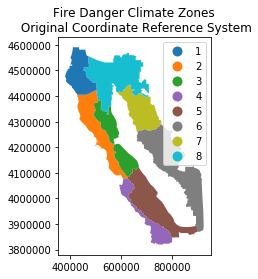

In [30]:
# Visualize Shapefiles in Original Projection
ax = geodf.plot(column='FDCZ',legend=True)
ax.set_title("Fire Danger Climate Zones\n Original Coordinate Reference System")

Text(0.5, 1, 'Fire Danger Climate Zones\n Lat,Lon Coordinate Reference System')

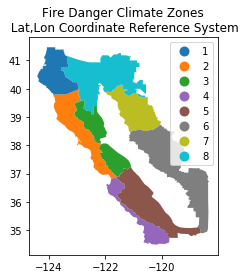

In [31]:
# Visualize map in Lat Lon coordinates
ax = geodf_geo.plot(column='FDCZ',legend=True)
ax.set_title("Fire Danger Climate Zones\n Lat,Lon Coordinate Reference System")

## Point in Polygon with Ray Casting Algorithm

References:
    
    https://en.wikipedia.org/wiki/Point_in_polygon#Ray_casting_algorithm
    
    https://automating-gis-processes.github.io/CSC18/lessons/L4/point-in-polygon.html

In [32]:
# Create a point shape
df_point = pd.DataFrame(
    {'City': ['San Ramon'],
     'State': ['California'],
     'Country': ['United States'],
     'Latitude': [san_ramon_lat],
     'Longitude': [san_ramon_lon]})
geodf_geo_point = geopandas.GeoDataFrame(
    df_point, geometry=geopandas.points_from_xy(df_point.Longitude, df_point.Latitude))
print(geodf_geo_point)

        City       State        Country  Latitude  Longitude  \
0  San Ramon  California  United States   37.7644   -121.954   

                      geometry  
0  POINT (-121.95400 37.76440)  


In [33]:
# Create point shapes
df_points = pd.DataFrame(
    {'City': ['San Ramon', 'PointCV', 'Point3'],
     'State': ['California', 'California', 'California'],
     'Country': ['United States', 'United States', 'United States'],
     'Latitude': [san_ramon_lat, 39.0, 39.0],
     'Longitude': [san_ramon_lon, -122.0, -122.5]
    })
geodf_geo_points = geopandas.GeoDataFrame(
    df_points, geometry=geopandas.points_from_xy(df_points.Longitude, df_points.Latitude))
print(geodf_geo_points)

        City       State        Country  Latitude  Longitude  \
0  San Ramon  California  United States   37.7644   -121.954   
1    PointCV  California  United States   39.0000   -122.000   
2     Point3  California  United States   39.0000   -122.500   

                      geometry  
0  POINT (-121.95400 37.76440)  
1  POINT (-122.00000 39.00000)  
2  POINT (-122.50000 39.00000)  


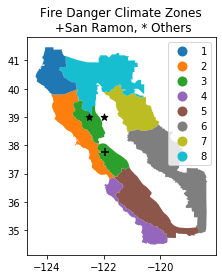

In [34]:
# Overplot that point shape within the Fire Danger Climate Zones
fig, ax = plt.subplots()
geodf_geo.plot(ax=ax,column='FDCZ',legend=True)
ax.set_title("Fire Danger Climate Zones\n +San Ramon, * Others")
geodf_geo_points.iloc[1:].plot(ax=ax, color='black', marker='*', markersize=50)
#geodf_geo_point.plot(ax=ax, color='black', marker='+', markersize=50)
geodf_geo_points.iloc[0:1].plot(ax=ax, color='black', marker='+', markersize=50)

In [35]:
# Check if points are within each polygon using the within function
# Using .within() from Shapely: https://shapely.readthedocs.io/en/latest/manual.html#object.within
for shap_indx in range(geodf_geo.shape[0]):
    #print(geodf_geo.loc[shap_indx])
    print( geodf_geo.loc[shap_indx,'FDCZ'] )
    is_within = geodf_geo_points.within(geodf_geo.loc[shap_indx,'geometry'])
    print(is_within, type(is_within))

2
0    False
1    False
2    False
dtype: bool <class 'pandas.core.series.Series'>
7
0    False
1    False
2    False
dtype: bool <class 'pandas.core.series.Series'>
4
0    False
1    False
2    False
dtype: bool <class 'pandas.core.series.Series'>
8
0    False
1    False
2    False
dtype: bool <class 'pandas.core.series.Series'>
1
0    False
1    False
2    False
dtype: bool <class 'pandas.core.series.Series'>
6
0    False
1    False
2    False
dtype: bool <class 'pandas.core.series.Series'>
5
0    False
1    False
2    False
dtype: bool <class 'pandas.core.series.Series'>
3
0     True
1    False
2     True
dtype: bool <class 'pandas.core.series.Series'>


### Expand Multipolygons into one Polygon per row

In [36]:
print(geodf_geo)
print(geodf_geo.shape)

   index  OBJECTID FDCZ    Shape_Leng    Shape_Area  \
0      0         1    2  1.390085e+06  1.766655e+10   
1      1         2    7  7.294358e+05  1.543029e+10   
2      2         3    4  9.584138e+05  9.903732e+09   
3      3         4    8  1.449745e+06  3.008260e+10   
4      4         5    1  7.236206e+05  1.336352e+10   
5      6         7    6  1.499360e+06  3.551770e+10   
6      7         8    5  1.025812e+06  2.345961e+10   
7      8        10    3  1.108385e+06  1.449150e+10   

                                            geometry  
0  MULTIPOLYGON (((-122.77477 38.82187, -122.7727...  
1  POLYGON ((-121.02712 38.50817, -121.11282 38.4...  
2  POLYGON ((-121.68289 36.85452, -121.68208 36.8...  
3  POLYGON ((-121.44771 41.25871, -121.44625 41.2...  
4  POLYGON ((-122.97653 40.22560, -122.97649 40.2...  
5  POLYGON ((-118.64781 34.89160, -118.64169 34.9...  
6  POLYGON ((-121.28621 37.18223, -121.28596 37.1...  
7  MULTIPOLYGON (((-121.91350 38.04193, -121.8102...  
(8, 6)


In [37]:
# Use reset_index to avoid complex indices that would complicate FOR loops
geodf_geo_exploded = geodf_geo.explode().reset_index()
print(geodf_geo_exploded)
print(geodf_geo_exploded.shape)

   level_0  level_1  index  OBJECTID FDCZ    Shape_Leng    Shape_Area  \
0        0        0      0         1    2  1.390085e+06  1.766655e+10   
1        0        1      0         1    2  1.390085e+06  1.766655e+10   
2        1        0      1         2    7  7.294358e+05  1.543029e+10   
3        2        0      2         3    4  9.584138e+05  9.903732e+09   
4        3        0      3         4    8  1.449745e+06  3.008260e+10   
5        4        0      4         5    1  7.236206e+05  1.336352e+10   
6        5        0      6         7    6  1.499360e+06  3.551770e+10   
7        6        0      7         8    5  1.025812e+06  2.345961e+10   
8        7        0      8        10    3  1.108385e+06  1.449150e+10   
9        7        1      8        10    3  1.108385e+06  1.449150e+10   

                                            geometry  
0  POLYGON ((-122.77477 38.82187, -122.77270 38.8...  
1  POLYGON ((-122.77477 38.82187, -122.77277 38.7...  
2  POLYGON ((-121.02712 38.5081

In [38]:
# Check if points are within each polygon using the within function
# Using .within() from Shapely: https://shapely.readthedocs.io/en/latest/manual.html#object.within
for shap_indx in range(geodf_geo_exploded.shape[0]):
    print('shap_indx:',shap_indx,
          '    FDCZ:',geodf_geo_exploded.loc[shap_indx,'FDCZ'] )
    within = geodf_geo_points.within(geodf_geo_exploded.loc[shap_indx,'geometry'])
    print(within, type(within))

shap_indx: 0     FDCZ: 2
0    False
1    False
2    False
dtype: bool <class 'pandas.core.series.Series'>
shap_indx: 1     FDCZ: 2
0    False
1    False
2    False
dtype: bool <class 'pandas.core.series.Series'>
shap_indx: 2     FDCZ: 7
0    False
1    False
2    False
dtype: bool <class 'pandas.core.series.Series'>
shap_indx: 3     FDCZ: 4
0    False
1    False
2    False
dtype: bool <class 'pandas.core.series.Series'>
shap_indx: 4     FDCZ: 8
0    False
1    False
2    False
dtype: bool <class 'pandas.core.series.Series'>
shap_indx: 5     FDCZ: 1
0    False
1    False
2    False
dtype: bool <class 'pandas.core.series.Series'>
shap_indx: 6     FDCZ: 6
0    False
1    False
2    False
dtype: bool <class 'pandas.core.series.Series'>
shap_indx: 7     FDCZ: 5
0    False
1    False
2    False
dtype: bool <class 'pandas.core.series.Series'>
shap_indx: 8     FDCZ: 3
0     True
1    False
2    False
dtype: bool <class 'pandas.core.series.Series'>
shap_indx: 9     FDCZ: 3
0    False
1    False

   level_0  level_1  index  OBJECTID FDCZ    Shape_Leng    Shape_Area  \
0        0        0      0         1    2  1.390085e+06  1.766655e+10   
1        0        1      0         1    2  1.390085e+06  1.766655e+10   
2        1        0      1         2    7  7.294358e+05  1.543029e+10   
3        2        0      2         3    4  9.584138e+05  9.903732e+09   
4        3        0      3         4    8  1.449745e+06  3.008260e+10   
5        4        0      4         5    1  7.236206e+05  1.336352e+10   
6        5        0      6         7    6  1.499360e+06  3.551770e+10   
7        6        0      7         8    5  1.025812e+06  2.345961e+10   
8        7        0      8        10    3  1.108385e+06  1.449150e+10   
9        7        1      8        10    3  1.108385e+06  1.449150e+10   

                                            geometry polygon  
0  POLYGON ((-122.77477 38.82187, -122.77270 38.8...     2_0  
1  POLYGON ((-122.77477 38.82187, -122.77277 38.7...     2_1  
2  POLY

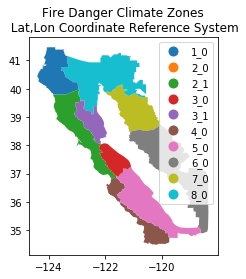

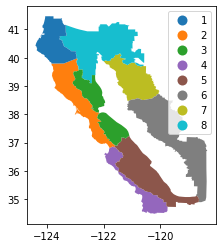

In [39]:
geodf_geo_exploded["polygon"] = geodf_geo_exploded.apply(lambda x: f'{x["FDCZ"]}_{x["level_1"]}', axis=1)
print(geodf_geo_exploded)
# Visualize exploded geometries in Lat Lon coordinates map
ax = geodf_geo_exploded.plot(column='polygon',legend=True)
ax.set_title("Fire Danger Climate Zones\n Lat,Lon Coordinate Reference System")
ax = geodf_geo_exploded.plot(column='FDCZ',legend=True)

Note that for FDCZ: 3, there are two polygons, shap_indx: 9 which contains geodf_geo_points[0], and shap_indx: 9 which contains geodf_geo_points[2]

That implies that ***multipolygon expansion is not needed***, see for example...     
     
     geodf_geo.explode()

Since ***.within() already considered the multipolygon geometries***, 
see for example...
     
     geodf_geo_points.within(geodf_geo.loc[shap_indx,'geometry']) capture these two shapes

### Associate data points to Climate zones

### Calculate the maximum daily wind speed. 

In [136]:
max_winds_df = pd.DataFrame(columns=['polygon'])
max_winds_df['polygon'] = geodf_geo_exploded['polygon']
max_winds_df['speed'] = np.nan
print(max_winds_df)

  polygon  speed
0     2_0    NaN
1     2_1    NaN
2     7_0    NaN
3     4_0    NaN
4     8_0    NaN
5     1_0    NaN
6     6_0    NaN
7     5_0    NaN
8     3_0    NaN
9     3_1    NaN


    max_winds_df['speed'].iloc[0] = 0
    max_winds_df['speed'].loc[ max_winds_df['polygon'] == '7_0' ] = 3.3
    print(max_winds_df)

    print(speed_time)
    max_winds_df['speed'].iloc[0] = max(0,max(speed_time))
    print(max_winds_df)

    print(type(lats),lats.shape)
    print(geodf_geo_exploded.shape)

In [138]:
# This should run in less than 9 minutes
for wrf_x_indx in range(lats.shape[1]):              # Loop over WRF grid points
    for wrf_y_indx in range(lats.shape[2]):
        ##print(wrf_x_indx,wrf_y_indx, lats[ 0,wrf_x_indx,wrf_y_indx],longs[0,wrf_x_indx,wrf_y_indx])
        
        # Create point shapes from WRF grid point
        df_pnt = pd.DataFrame(
            {'Latitude': [ lats[ 0,wrf_x_indx,wrf_y_indx] ],
             'Longitude':[ longs[0,wrf_x_indx,wrf_y_indx] ] })
        geodf_geo_pnt = geopandas.GeoDataFrame(
            df_pnt, geometry=geopandas.points_from_xy(df_pnt.Longitude, df_pnt.Latitude))
        ##print(geodf_geo_pnt)
        
        # Is this point in the Fire Danger Climatic Zone?
        for polygon_indx in range(geodf_geo_exploded.shape[0]):  # Loop over the Fire Danger Climate Zones 
            which_polygon = str( geodf_geo_exploded['polygon'].iloc[polygon_indx] )
            ##print(which_polygon)
            ##print(geodf_geo_exploded['polygon'].iloc[polygon_indx])
            within = geodf_geo_pnt.within(geodf_geo_exploded.loc[polygon_indx,'geometry'])
            #if len(within) != 1:
            ##print('Unexpected len(within)',len(within)) 
            if within[0]:
                ##print(within, type(within), len(within)) 
                # List wind values
                u10_time = u10[:,wrf_x_indx,wrf_y_indx]
                ##print('u10:', u10_time)
                v10_time = v10[:,wrf_x_indx,wrf_y_indx]
                ##print('v10:', v10_time)
                speed_time = (u10_time**2 + v10_time**2)**0.5
                current_max_wind = max_winds_df['speed'].loc[ max_winds_df['polygon'] == which_polygon ]
                current_max_wind = current_max_wind.item()
                ##print(max(speed_time))
                ##print(current_max_wind)
                new_max_wind = max( max(speed_time),current_max_wind )
                max_winds_df['speed'].loc[ max_winds_df['polygon'] == which_polygon ] = new_max_wind
                
                # Verification: Review the print out from the lines below to verify that the code is behaiving as expected:
                #print(which_polygon)
                #print(current_max_wind, max(speed_time), new_max_wind,
                #      max_winds_df['speed'].loc[ max_winds_df['polygon'] == which_polygon ].item() )

### Map displaying each climate zone color coded by the maximum daily wind speed. 

***Synthetic data***
    geodf_final = geodf_geo_exploded
    max_winds_df["speed"] = [ 0.0,  5.0, 10.0, 
                          15.0, 20.0, 25.0, 
                          30.0, 35.0, 40.0, 
                          45.0]

In [139]:
geodf_geo_exploded['MaxWind'] = max_winds_df["speed"]
print(max_winds_df)
print(geodf_geo_exploded)

  polygon      speed
0     2_0        NaN
1     2_1  24.581490
2     7_0  22.123005
3     4_0  14.559490
4     8_0  22.988955
5     1_0  26.769245
6     6_0  21.517227
7     5_0  14.552298
8     3_0  17.541578
9     3_1  24.679468
   level_0  level_1  index  OBJECTID FDCZ    Shape_Leng    Shape_Area  \
0        0        0      0         1    2  1.390085e+06  1.766655e+10   
1        0        1      0         1    2  1.390085e+06  1.766655e+10   
2        1        0      1         2    7  7.294358e+05  1.543029e+10   
3        2        0      2         3    4  9.584138e+05  9.903732e+09   
4        3        0      3         4    8  1.449745e+06  3.008260e+10   
5        4        0      4         5    1  7.236206e+05  1.336352e+10   
6        5        0      6         7    6  1.499360e+06  3.551770e+10   
7        6        0      7         8    5  1.025812e+06  2.345961e+10   
8        7        0      8        10    3  1.108385e+06  1.449150e+10   
9        7        1      8        10   

/Applications/anaconda/envs/netcdf/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


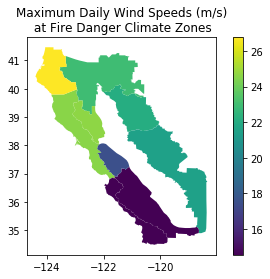

In [141]:
# Visualize exploded geometries in Lat Lon coordinates map
ax = geodf_final.plot(column='MaxWind',legend=True)
ax.set_title("Maximum Daily Wind Speeds (m/s)\n at Fire Danger Climate Zones")
# Save figure as PNG file
plt.savefig('fdcz_max_winds.png')